In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',80)
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180

In [2]:
dataset = pd.read_csv(filepath_or_buffer='./startups/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = dataset.loc[:,['R&D Spend','Administration','Marketing Spend','State']]
y = dataset.loc[:,['Profit']]

In [4]:
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()
labelencodedDF = X[categorical_cols].apply(lambda each_column : label_encoder.fit_transform(each_column))
X.loc[:,tuple(categorical_cols)] = labelencodedDF
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
one_hot_enc = OneHotEncoder(categories='auto', drop='first')
ct = ColumnTransformer([('encoder', one_hot_enc, categorical_cols)], remainder='passthrough')
X_state_onehot_encoded = ct.fit_transform(X[categorical_cols])

In [9]:
onehot_cols = ["State_"+str(int(i)) for i in range(X_state_onehot_encoded.shape[1])]
df_onehot = pd.DataFrame(X_state_onehot_encoded, columns = onehot_cols)

In [10]:
df = pd.concat([X, df_onehot], axis=1)
X = df.drop(labels=['State'],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State_0,State_1
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [12]:
linm = LinearRegression()
rfe = RFECV(estimator=linm, min_features_to_select=1, step=1)
rfe.fit(X, y)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFECV(cv=None,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

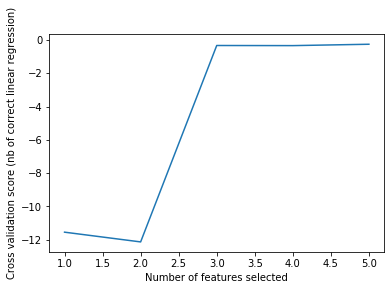

In [13]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct linear regression)")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [14]:
from sklearn.feature_selection import RFE
linm = LinearRegression()
rfe = RFE(estimator=linm, n_features_to_select=1, step=1)
rfe.fit(X, y)
rfe.ranking_

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 4, 5, 1, 2])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X[['R&D Spend','Marketing Spend','State_0','State_1']],y,test_size=.2,random_state=0)

In [17]:
regressor  = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
regressor.score(x_test,y_test)

0.9446968769428332